In [530]:
import math
import pandas as pd

#q1

brooklyn_sales = pd.read_csv("rollingsales_brooklyn.csv",skiprows= 4)
print(brooklyn_sales.shape)
print("\nRow 1\n")
print(brooklyn_sales.iloc[0])
print("\nRow 2\n")
print(brooklyn_sales.iloc[1])
print("\nRow 14\n")
print(brooklyn_sales.iloc[13])

(23373, 21)

Row 1

BOROUGH                                                                      3
NEIGHBORHOOD                                                                  
BUILDING CLASS CATEGORY           15  CONDOS - 2-10 UNIT RESIDENTIAL          
TAX CLASS AT PRESENT                                                          
BLOCK                                                                      814
LOT                                                                       1103
EASE-MENT                                                                     
BUILDING CLASS AT PRESENT                                                     
ADDRESS                             342 53RD    STREET                        
APART\r\nMENT NUMBER                                                          
ZIP CODE                                                                 11220
RESIDENTIAL UNITS                                                            0
COMMERCIAL UNITS                

In [531]:
#q2

brooklyn_sales.columns = map(str.lower,brooklyn_sales.columns)
n=0
for val in brooklyn_sales.columns:
    temp = val.replace(" ","_")
    temp = temp.replace("\n","")
    brooklyn_sales.rename(columns={brooklyn_sales.columns[n]:temp},inplace=True)
    n=n+1
print(brooklyn_sales.iloc[13])

borough                                                                      3
neighborhood                                         BATH BEACH               
building_class_category                                                       
tax_class_at_present                                                         4
block                                                                     6370
lot                                                                       1313
ease-ment                                                                     
building_class_at_present                                                   RP
address                             88 BAY 20TH   STREET                      
apart\rment_number                                                P12         
zip_code                                                                 11214
residential_units                                                            0
commercial_units                                    

In [532]:
#q3
import re
brooklyn_sales['sale_price'] = brooklyn_sales['sale_price'].apply(lambda x:re.sub(',','',x))
brooklyn_sales['sale_price'] = brooklyn_sales['sale_price'].apply(lambda x:x.lstrip('$'))
brooklyn_sales['sale_price'] = brooklyn_sales['sale_price'].astype(float)
print(brooklyn_sales['sale_price'])

0         403572.0
1         218010.0
2         952311.0
3         842692.0
4         815288.0
           ...    
23368          0.0
23369          0.0
23370    1090000.0
23371          0.0
23372          0.0
Name: sale_price, Length: 23373, dtype: float64


In [533]:
#q4
null_values = brooklyn_sales[brooklyn_sales['sale_price']==0]
print("The number of missing sale prices are: %.0f." %len(null_values))

The number of missing sale prices are: 8791.


In [534]:
#q5
brooklyn_sales['land_square_feet'] = brooklyn_sales['land_square_feet'].apply(lambda x:re.sub(',','',x))
brooklyn_sales['land_square_feet']=brooklyn_sales['land_square_feet'].astype(float)

In [535]:
#q6

brooklyn_sales['gross_square_feet'] = brooklyn_sales['gross_square_feet'].apply(lambda x:re.sub(',','',x))
brooklyn_sales['gross_square_feet']=brooklyn_sales['gross_square_feet'].astype(float)

In [536]:
#q7
print(brooklyn_sales['sale_date'])
brooklyn_sales['sale_date']=pd.to_datetime(brooklyn_sales['sale_date'])

0          7/9/13
1         7/12/13
2         4/25/13
3         4/25/13
4         4/25/13
           ...   
23368     1/17/13
23369     1/17/13
23370    12/28/12
23371     4/17/13
23372    12/14/12
Name: sale_date, Length: 23373, dtype: object


In [537]:
#q8
brooklyn_sales['year_built']=brooklyn_sales['year_built'].astype(int)

In [538]:
#q9
brooklyn_sales['zip_code']=brooklyn_sales['zip_code'].astype(str)

In [539]:
#q11
brooklyn_sales['address'] = brooklyn_sales['address'].apply(lambda x:re.sub('EAST/WEST','E/W',x))
brooklyn_sales['address'] = brooklyn_sales['address'].apply(lambda x:re.sub('STREET/AVENUE','ST/AVE',x))

Text(0.5, 1.0, 'Sale Price Frequency')

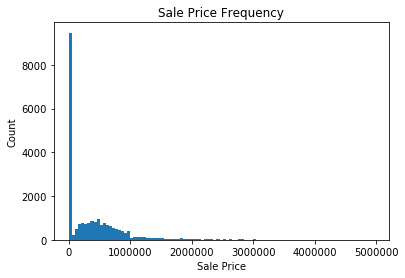

In [540]:
#q12
#a
import matplotlib.pyplot as plt
vals = (brooklyn_sales['sale_price'])
bins_sale = []
n=0
while n<5000000:
    bins_sale.append(n)
    n=n+50000
n,bins,patches = plt.hist(brooklyn_sales['sale_price'],bins = bins_sale)
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Sale Price Frequency")

Text(0.5, 1.0, 'Sale Price Frequency(Omitting Missing or Zero Values)')

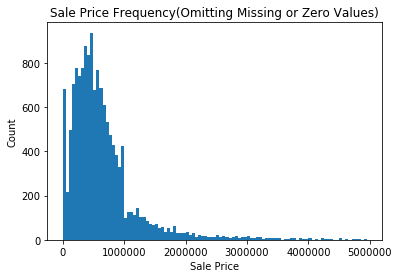

In [541]:
#q12
#b
n,bins,patches = plt.hist(brooklyn_sales[brooklyn_sales['sale_price']!=0]['sale_price'],bins = bins_sale)
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.title("Sale Price Frequency(Omitting Missing or Zero Values)")

Text(0.5, 1.0, 'Sale Price Frequency')

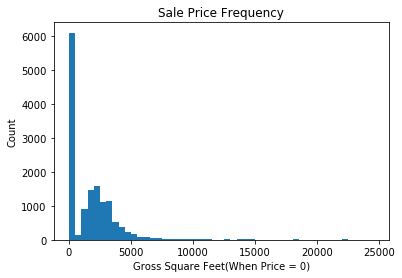

In [542]:
#q12
#c
bins_feet = []
n=0
while n<(25000):
    bins_feet.append(n)
    n=n+500
n,bins,patches = plt.hist(brooklyn_sales[brooklyn_sales['sale_price']!=0]['gross_square_feet'],bins = bins_feet)
plt.xlabel("Gross Square Feet(When Price = 0)")
plt.ylabel("Count")
plt.title("Sale Price Frequency")

In [543]:
#q13
correct_sales = brooklyn_sales[brooklyn_sales['sale_price']!=0]

Text(0.5, 1.0, 'Gross Square Foot vs Sale Price')

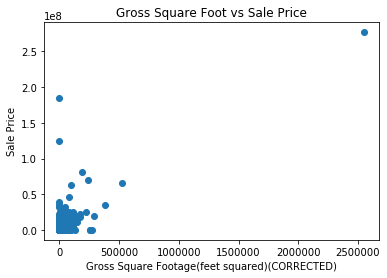

In [544]:
#q14
plt.scatter(correct_sales['gross_square_feet'],correct_sales['sale_price'])
plt.xlabel("Gross Square Footage(feet squared)(CORRECTED)")
plt.ylabel("Sale Price")
plt.title("Gross Square Foot vs Sale Price")

c:\users\zshel\pycharmprojects\hw4_cis5400\venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\zshel\pycharmprojects\hw4_cis5400\venv\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\zshel\pycharmprojects\hw4_cis5400\venv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Gross Square Foot vs Sale Price')

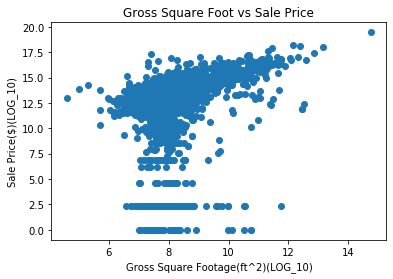

In [545]:
#q15
'''
Setting the scale of the axis to logs cause data loss, so the values are changed
manually
'''
import numpy as np
correct_sales['sale_price'] = np.log(correct_sales['sale_price'])
correct_sales['gross_square_feet'] = np.log(correct_sales['gross_square_feet'])
plt.scatter(correct_sales['gross_square_feet'],correct_sales['sale_price'])
plt.xlabel("Gross Square Footage(ft^2)(LOG_10)")
plt.ylabel("Sale Price($)(LOG_10)")
plt.title("Gross Square Foot vs Sale Price")

In [546]:
#q16
brooklyn_family_sales = brooklyn_sales[brooklyn_sales['building_class_category'].str.contains("FAMILY")]

Text(0.5, 1.0, 'Family Homes Gross Square Foot vs Sale Price(LOG)')

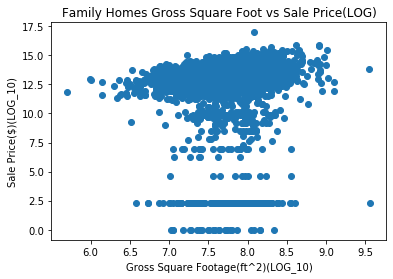

In [547]:
plt.scatter(np.log(brooklyn_family_sales['gross_square_feet']),np.log(brooklyn_family_sales['sale_price']))
plt.xlabel("Gross Square Footage(ft^2)(LOG_10)")
plt.ylabel("Sale Price($)(LOG_10)")
plt.title("Family Homes Gross Square Foot vs Sale Price(LOG)")

In [548]:
#q17
brooklyn_family_sales_less= brooklyn_family_sales[brooklyn_family_sales['sale_price']<100000]
print(len(brooklyn_family_sales_less))

4745


In [549]:
#q18
sale_price_count = (brooklyn_family_sales['sale_price'].value_counts())
print(sale_price_count[1])

27


Text(0.5, 1.0, 'Family Homes Gross Square Foot vs Sale Price')

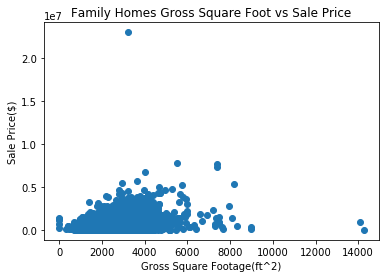

In [555]:
#q19
brooklyn_family_sales =brooklyn_family_sales[brooklyn_family_sales['sale_price']>=0]
#q20
plt.scatter((brooklyn_family_sales['gross_square_feet']),(brooklyn_family_sales['sale_price']))
plt.xlabel("Gross Square Footage(ft^2)")
plt.ylabel("Sale Price($)")
plt.title("Family Homes Gross Square Foot vs Sale Price")

Text(0.5, 1.0, 'Family Homes Gross Square Foot vs Sale Price(LOG)')

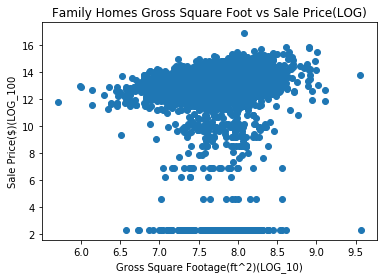

In [556]:
#q21
brooklyn_family_sales =brooklyn_family_sales[brooklyn_family_sales['sale_price']>=5]
plt.scatter(np.log(brooklyn_family_sales['gross_square_feet']),np.log(brooklyn_family_sales['sale_price']))
plt.xlabel("Gross Square Footage(ft^2)(LOG_10)")
plt.ylabel("Sale Price($)(LOG_100")
plt.title("Family Homes Gross Square Foot vs Sale Price(LOG)")